# A Brief Overview of Iterative Methods for Eigenvalue Problems
<font  size=5>
Amirhossein Mahmoudi
<br>
<font  size=4>
Supervisior: Dr. Mohammadreza Razvan
<br>
<font  size=3>
Matrix Calculations course
<br>
<font  size=2>
Sharif University of Technology
<br>
<font  size=2>
Department of Mathematical Sciences


The eigenvalue problem is one of the most essential and valuable problems in linear algebra. It deals with finding the special values and vectors of a square matrix that satisfy a certain equation. The equation is of the form $Ax = \lambda x$, where $A$ is a given matrix, $x$ is an unknown vector, and $\lambda$ is an unknown scalar. The vector $x$ is called an eigenvector of $A$, and the scalar $\lambda$ is called an eigenvalue of $A$. The word "eigen" comes from the German word for "own" or "characteristic", meaning that the eigenvectors and eigenvalues capture some essential properties of the matrix.

The eigenvalue problem arises in many applications, such as modeling vibrations, stability, and data analysis. For example, suppose we have a system of masses and springs, and we want to find the natural frequencies and modes of vibration of the system. We can represent the system by a matrix $A$, where each entry $a_{ij}$ indicates the stiffness of the spring connecting the $i$-th and the $j$-th mass. Then, the equation $Ax = \lambda x$ describes how the displacements of the masses $x$ change over time, and the eigenvalues $\lambda$ are the squares of the natural frequencies, and the eigenvectors $x$ are the modes of vibration. By finding the eigenvalues and eigenvectors of $A$, we can understand how the system behaves and how to control it.

To solve the eigenvalue problem, we must find all the possible values of $\lambda$ and the corresponding vectors of $x$ that make the equation true. There are various methods to do this, depending on the type and the size of the matrix $A$. One of the most common methods is finding the roots of the characteristic polynomial of $A$, defined as $p(\lambda) = \det(\lambda I - A)$. The determinant of $\lambda I - A$ is a polynomial function of $\lambda$, and its roots are precisely the eigenvalues of $A$. Once we find the eigenvalues, we can find them by plugging them into the equation $Ax = \lambda x$ and solving for $x$. However, this method can be difficult or impossible to carry out by hand, especially for large or complicated matrices. Therefore, we often use numerical algorithms, such as the power method, the QR algorithm, or the Jacobi method, to approximate the eigenvalues and eigenvectors of $A$.

The eigenvalue problem reveals important properties and insights about the matrix and the system it represents. For example, the number of eigenvalues of $A$ is equal to the dimension of $A$, and the sum of the eigenvalues of $A$ is equal to the trace of $A$, which is the sum of the diagonal entries of $A$. The product of the eigenvalues of $A$ equals the determinant of $A$, which measures the volume change of $A$. The eigenvalues and eigenvectors of $A$ also determine the rank, the nullity, the inverse, and the powers of $A$. Moreover, some special matrices have special eigenvalues and eigenvectors. For example, a symmetric matrix $A$ has only real eigenvalues and orthogonal eigenvectors, meaning that the eigenvectors are perpendicular to each other. A positive definite matrix $A$ has only positive eigenvalues and positive definite eigenvectors, meaning that the eigenvectors point in the same direction as $A$. These properties make the eigenvalue problem a powerful tool for analyzing and solving linear systems.

A common way to find eigenvalues in basic linear algebra courses is to solve a characteristic polynomial. However, this method has a drawback: the solutions of the characteristic polynomial can change drastically if the polynomial coefficients are slightly altered, even for eigenvalues that are not ill-conditioned. Instead of using this approach, we will use different techniques.
Iterative methods help solve eigenvalue problems for large matrices, which are matrices that have a high number of rows and columns. Large matrices are often sparse, meaning that most entries are zero and have unique structures, such as symmetry, positive definiteness, or diagonal dominance. These properties can be exploited by iterative methods to reduce the computational cost and storage requirements of finding the eigenvalues and eigenvectors of large matrices.

Some of the most common iterative methods for eigenvalue problems are:

- Power method: This is the simplest iterative method. It computes the largest eigenvalue in absolute value and its corresponding eigenvector by repeatedly multiplying a random vector by the matrix and normalizing it. The power method is easy to implement and only requires matrix-vector multiplication, but it converges slowly and may fail if there are multiple eigenvalues of the same magnitude.
- Inverse iteration method: This is a variant of the power method, which computes the eigenvalue closest to a given value and its corresponding eigenvector by repeatedly solving a linear system with the matrix shifted by the given value and normalizing the solution. The inverse iteration method can be used to find any eigenvalue, but it requires solving a linear system at each step, which can be costly and unstable.
- Rayleigh quotient iteration method: This is another variant of the power method, which computes the eigenvalue and eigenvector of a symmetric matrix by using the Rayleigh quotient, which is the ratio of $x^T A x$ and $x^T x$, as the shift value for the inverse iteration method. The Rayleigh quotient iteration method can converge faster than the inverse iteration method, but it is not guaranteed to converge to the desired eigenvalue and may oscillate or diverge.
= Arnoldi method: This is a generalization of the power method, which computes a few eigenvalues and eigenvectors of a matrix by constructing an orthogonal basis for a Krylov subspace, which is the span of successive powers of the matrix applied to a random vector, and then finding the eigenvalues and eigenvectors of a smaller matrix that preserves the action of the original matrix on the subspace. The Arnoldi method can find eigenvalues of any magnitude and multiplicity, but it requires storing and orthogonalizing the basis vectors, which can be expensive and ill-conditioned.
- Davidson method: This is an improvement of the Arnoldi method, which computes a few eigenvalues and eigenvectors of a symmetric matrix by using a preconditioner, which is a matrix that approximates the inverse of the matrix, to accelerate the convergence of the Krylov subspace and reduce the size of the smaller matrix. The Davidson method can be more efficient and robust than the Arnoldi method, but it depends on the choice of the preconditioner, which can be challenging to construct and apply.
- Jacobi-Davidson method:This is a further improvement of the Davidson method, which computes a few eigenvalues and eigenvectors of a symmetric matrix by using a correction equation, which is a linear system that updates the approximate eigenvector by minimizing the residual, to refine the Krylov subspace and the preconditioner. The Jacobi-Davidson method can be more accurate and flexible than the Davidson method, but it requires solving a correction equation at each step, which can be challenging and time-consuming.
- Lanczos method: This is a special case of the Arnoldi method, which computes a few eigenvalues and eigenvectors of a symmetric matrix by constructing a tridiagonal matrix that preserves the action of the original matrix on the Krylov subspace. The Lanczos method can be faster and more stable than the Arnoldi method, but it may suffer from loss of orthogonality and spurious eigenvalues due to round-off errors.



In [41]:
import numpy as np
import matplotlib as plt
import plotly as plx
import methods
import matrix_tools as mt
import pandas as pd
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
from functools import partial


# Making Random Matrices

In [42]:
size=100
sparsity=1e-4
scale=1e+2

In [43]:
matrices={
    'Random Sparse':mt.random_sparse(size,sparsity=sparsity),
    'Symetric Sparse':mt.symmetric_sparse(size,sparsity=sparsity),
    'Diagonal-dominant':mt.digaonal_dominant(size,sparsity=sparsity),
    'Diagonal non-TDA':mt.diag_non_tda(size,sparsity=sparsity),   
    'Diagonal Clustered':mt.diagonal_clustered(size),
    'Diagonal Well-seperated':mt.digaonal_well_seperated(size), 
          }

## Saving Matrices

In [44]:
import pickle

with open('matrices','wb') as f:
    pickle.dump(matrices,f)

# with open('matrices','rb') as f:
#     matrices=pickle.load(f)

# Plot results Function

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import copy

%matplotlib inline
def plot_results(df_dict,mode='real_diff',maxiter=100,cols=2,):

    if(len(matrices)==1):
        cols=1
        rows=1
    else:
        rows=int(np.ceil(len(matrices)/cols))
    fig, ax = plt.subplots(nrows=rows, ncols=cols,figsize=(20,int(10*rows/cols)) )

    iter=0
    for matrix_name, df_result in df_dict.items():
        i=iter//cols
        j=iter%cols

        for method_name,result in df_result.iterrows():
            if(method_name=='Numpy.eig' and mode!='approx_eigens'):continue
            if len(matrices)==1:
                ax.semilogy(result[mode],label=method_name)       
                ax.set_xlabel('Number of iterations')
                if(mode=='approx_eigens'):ax.set_ylabel('Eigenvalue')
                else:
                    ax.set_ylabel('Error')
                ax.set_xlim(0,20)
                ax.legend(loc='best',fontsize='10')
                ax.set_title(matrix_name)
            elif(rows==1):

                ax[j].semilogy(result[mode],label=method_name)
                ax[j].set_xlabel('Number of iterations')
                if(mode=='approx_eigens'):ax[j].set_ylabel('Eigenvalue')
                else:
                    ax[j].set_ylabel('Error')
                ax[j].set_xlim(0,20)
                ax[j].legend(loc='best',fontsize='10')
                ax[j].set_title(matrix_name)
                
            else:
                if(mode=='approx_eigens'):
                    ax[i,j].scatter(x=result[mode].real,y=result[mode].imag,s=range(1,len(result[mode])+1),label=method_name)
                else:

                    ax[i,j].semilogy(result[mode],label=method_name)
                ax[i,j].set_xlabel('Number of iterations')
                if(mode=='approx_eigens'):ax[i,j].set_ylabel('Eigenvalue')
                else:
                    ax[i,j].set_ylabel('Error')
                ax[i,j].set_xlim(0,maxiter)
                ax[i,j].legend(loc='best',fontsize='10')
                ax[i,j].set_title(matrix_name)
        iter+=1
                
    if(mode=='real_diff'):
        suptitle='Real Residuals Plot (Diffrence Between Approxiamtion Value at each iteration and the numpy.eig actaul Value)'
    elif mode=='residuals':
        suptitle='Residuals Plot (Value used to check convergence at each iteration (not at the same scale for each method))'
    elif(mode=='approx_eigens'):
        suptitle='Eigenvalue Aprroxiamtion Plot'


         
    fig.suptitle(suptitle,fontsize=20)
    fig.set_tight_layout(tight=True)
    plt.show()
    return fig




# Smallest Eigenvalue

In [46]:
tol=1e-15
maxiter=100

## Defining Methods

In [47]:
methods_list_without_eigens_history={
    'numpy.eig':partial(methods.numpy_eigen,l=0,u=1),
    'inverse_iteration_use_inverse_rq_norm(2)':partial(methods.power_iteration,calc_min=True,use_inverse=True,norm_c_mode='2',use_rayleigh=True,maxiter=maxiter,tol=tol),
    'inverse_iteration_use_inverse_rq_norm(max_abs)':partial(methods.power_iteration,calc_min=True,use_inverse=True,norm_c_mode='max_abs',use_rayleigh=True,maxiter=maxiter,tol=tol),
    'inverse_iteration_use_inverse_norm(2)':partial(methods.power_iteration,calc_min=True,use_inverse=True,norm_c_mode='2',use_rayleigh=False,maxiter=maxiter,tol=tol),
    'inverse_iteration_use_inverse_norm(max_abs)':partial(methods.power_iteration,calc_min=True,use_inverse=True,norm_c_mode='max_abs',use_rayleigh=False,maxiter=maxiter,tol=tol),
    'inverse_iteration_rq_norm(2)':partial(methods.power_iteration,calc_min=True,use_inverse=False,norm_c_mode='2',use_rayleigh=True,maxiter=maxiter,tol=tol),
    'inverse_iteration_rq_norm(max_abs)':partial(methods.power_iteration,calc_min=True,use_inverse=False,norm_c_mode='max_abs',use_rayleigh=True,maxiter=maxiter,tol=tol),
    # 'inverse_iteration_norm(2)':partial(methods.power_iteration,calc_min=True,use_inverse=False,norm_c_mode='2',use_rayleigh=False,maxiter=maxiter,tol=tol),
    # 'inverse_iteration_norm(max_abs)':partial(methods.power_iteration,calc_min=True,use_inverse=False,norm_c_mode='max_abs',use_rayleigh=False,maxiter=maxiter,tol=tol),
    # 'simple_rq':methods.rayleigh_quotient_iteration(maxiter=maxiter,tol=tol),
    # 'davidson_1':methods.davidson_1,
    # 'davidson_2':methods.davidson_2,
    # 'davidson_3':methods.davidson_3,
    'davidson_4':partial(methods.davidson_4,maxiter=maxiter,tol=tol),
    'davidson_4_jacobi':partial(methods.davidson_4,jacobi=True,maxiter=maxiter,tol=tol),
    # 'davidson_4_hamiltonian':partial(methods.davidson_4,hamiltonian=True, maxiter=maxiter),
    'davidson_4_nonhermitian':partial(methods.davidson_4,non_hermitian=True,maxiter=maxiter,tol=tol),
         }

smallest_methods_list={
    'Numpy.eig':partial(methods.numpy_eigen,l=0,u=1),
    'Inverse Iteration (RQ-MatrixInverse-Norm2)':partial(methods.power_iteration,calc_min=True,use_inverse=True,norm_c_mode='2',use_rayleigh=True,maxiter=maxiter,tol=tol,output_approx_instead_of_residuals=True),
    'Inverse Iteration (RQ-MatrixInverse-MaxAbs)':partial(methods.power_iteration,calc_min=True,use_inverse=True,norm_c_mode='max_abs',use_rayleigh=True,maxiter=maxiter,tol=tol,output_approx_instead_of_residuals=True),
    'Inverse Iteration (MatrixInverse-Norm2)':partial(methods.power_iteration,calc_min=True,use_inverse=True,norm_c_mode='2',use_rayleigh=False,maxiter=maxiter,tol=tol,output_approx_instead_of_residuals=True),
    'Inverse Iteration (MatrixInverse-MaxAbs)':partial(methods.power_iteration,calc_min=True,use_inverse=True,norm_c_mode='max_abs',use_rayleigh=False,maxiter=maxiter,tol=tol,output_approx_instead_of_residuals=True),
    'Inverse Iteration (RQ-LinearSys-Norm2)':partial(methods.power_iteration,calc_min=True,use_inverse=False,norm_c_mode='2',use_rayleigh=True,maxiter=maxiter,tol=tol,output_approx_instead_of_residuals=True),
    'Inverse Iteration (RQ-LinearSys-MaxAbs)':partial(methods.power_iteration,calc_min=True,use_inverse=False,norm_c_mode='max_abs',use_rayleigh=True,maxiter=maxiter,tol=tol,output_approx_instead_of_residuals=True),
    # 'inverse_iteration_norm(2)':partial(methods.power_iteration,calc_min=True,use_inverse=False,norm_c_mode='2',use_rayleigh=False,maxiter=maxiter,tol=tol),
    # 'inverse_iteration_norm(max_abs)':partial(methods.power_iteration,calc_min=True,use_inverse=False,norm_c_mode='max_abs',use_rayleigh=False,maxiter=maxiter,tol=tol),
    # 'simple_rq':methods.rayleigh_quotient_iteration(maxiter=maxiter,tol=tol),
    # 'davidson_1':methods.davidson_1,
    # 'davidson_2':methods.davidson_2,
    # 'davidson_3':methods.davidson_3,
    'Davidson':partial(methods.davidson_4,maxiter=maxiter,tol=tol,output_approx_instead_of_residuals=True),
    'Jacobi-Davison':partial(methods.davidson_4,jacobi=True,maxiter=maxiter,tol=tol,output_approx_instead_of_residuals=True),
    # 'davidson_4_hamiltonian':partial(methods.davidson_4,hamiltonian=True, maxiter=maxiter),
    'Davidson (Nonhermitian)':partial(methods.davidson_4,non_hermitian=True,maxiter=maxiter,tol=tol,output_approx_instead_of_residuals=True),
         }


## Running Methods

In [48]:
smallest_results={}
for matrix_name, matrix in matrices.items():
    matrix_results={} 
    for name, method in smallest_methods_list.items():
         eigen_value,eigen_vector,duration,iteration,residuals,approx_eigens=method(matrix)
         matrix_results[name]={'eigen_value':eigen_value, 'eigen_vector':eigen_vector,'duration':duration,'iteration':iteration, 'residuals':residuals,'approx_eigens':approx_eigens }
    smallest_results[matrix_name]=matrix_results


2024-01-30 08:20:41.137 | SUCCESS  | methods:numpy_eigen:758 - numpy = [-282.46082998+0.j]; time = 0.023014307022094727 seconds
2024-01-30 08:20:41.569 | INFO     | methods:power_iteration:408 - Power iteration converged at iteration number = 33
2024-01-30 08:20:41.571 | SUCCESS  | methods:power_iteration:418 - Inverse iteration: use_inverse = True, use_rayleigh = True, norm_c_mode = 2 = -17.269904335005346; time = 0.4319634437561035 seconds.
2024-01-30 08:20:41.819 | INFO     | methods:power_iteration:408 - Power iteration converged at iteration number = 30
2024-01-30 08:20:41.821 | SUCCESS  | methods:power_iteration:418 - Inverse iteration: use_inverse = True, use_rayleigh = True, norm_c_mode = max_abs = -17.269904335005464; time = 0.22263741493225098 seconds.
2024-01-30 08:20:41.875 | INFO     | methods:power_iteration:408 - Power iteration converged at iteration number = 33
2024-01-30 08:20:41.877 | SUCCESS  | methods:power_iteration:418 - Inverse iteration: use_inverse = True, use

## Making Dataframes

In [49]:
df_smallest_results={}
for matrix_name, matrix_results in smallest_results.items():

    df_matrix_results=pd.DataFrame(matrix_results).T
    df_smallest_results[matrix_name]=df_matrix_results
    df_matrix_results.loc[:,'eigen_value']=df_matrix_results.iloc[:,0].apply(lambda x:x.item() if type(x) is not float else x)
    df_matrix_results['approx_eigens']=df_matrix_results['approx_eigens'].apply(np.ravel)
    df_matrix_results['residuals']=abs(df_matrix_results['residuals'].apply(np.ravel))
    df_matrix_results['eigen_vector']=df_matrix_results['eigen_vector'].apply(np.ravel)
    df_matrix_results['residual_diff']=abs(df_matrix_results['eigen_value']-df_matrix_results['eigen_value'][0])
    df_matrix_results['real_diff']=abs(df_matrix_results['approx_eigens']-df_matrix_results['eigen_value'][0])
    df_matrix_results=df_matrix_results.sort_values(by='residual_diff')
    df_smallest_results[matrix_name]=df_matrix_results


# Plot results Function

## Results

C:\Users\HP OMEN\AppData\Local\Temp\ipykernel_7088\2793290441.py:52: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[i,j].set_xlim(0,maxiter)


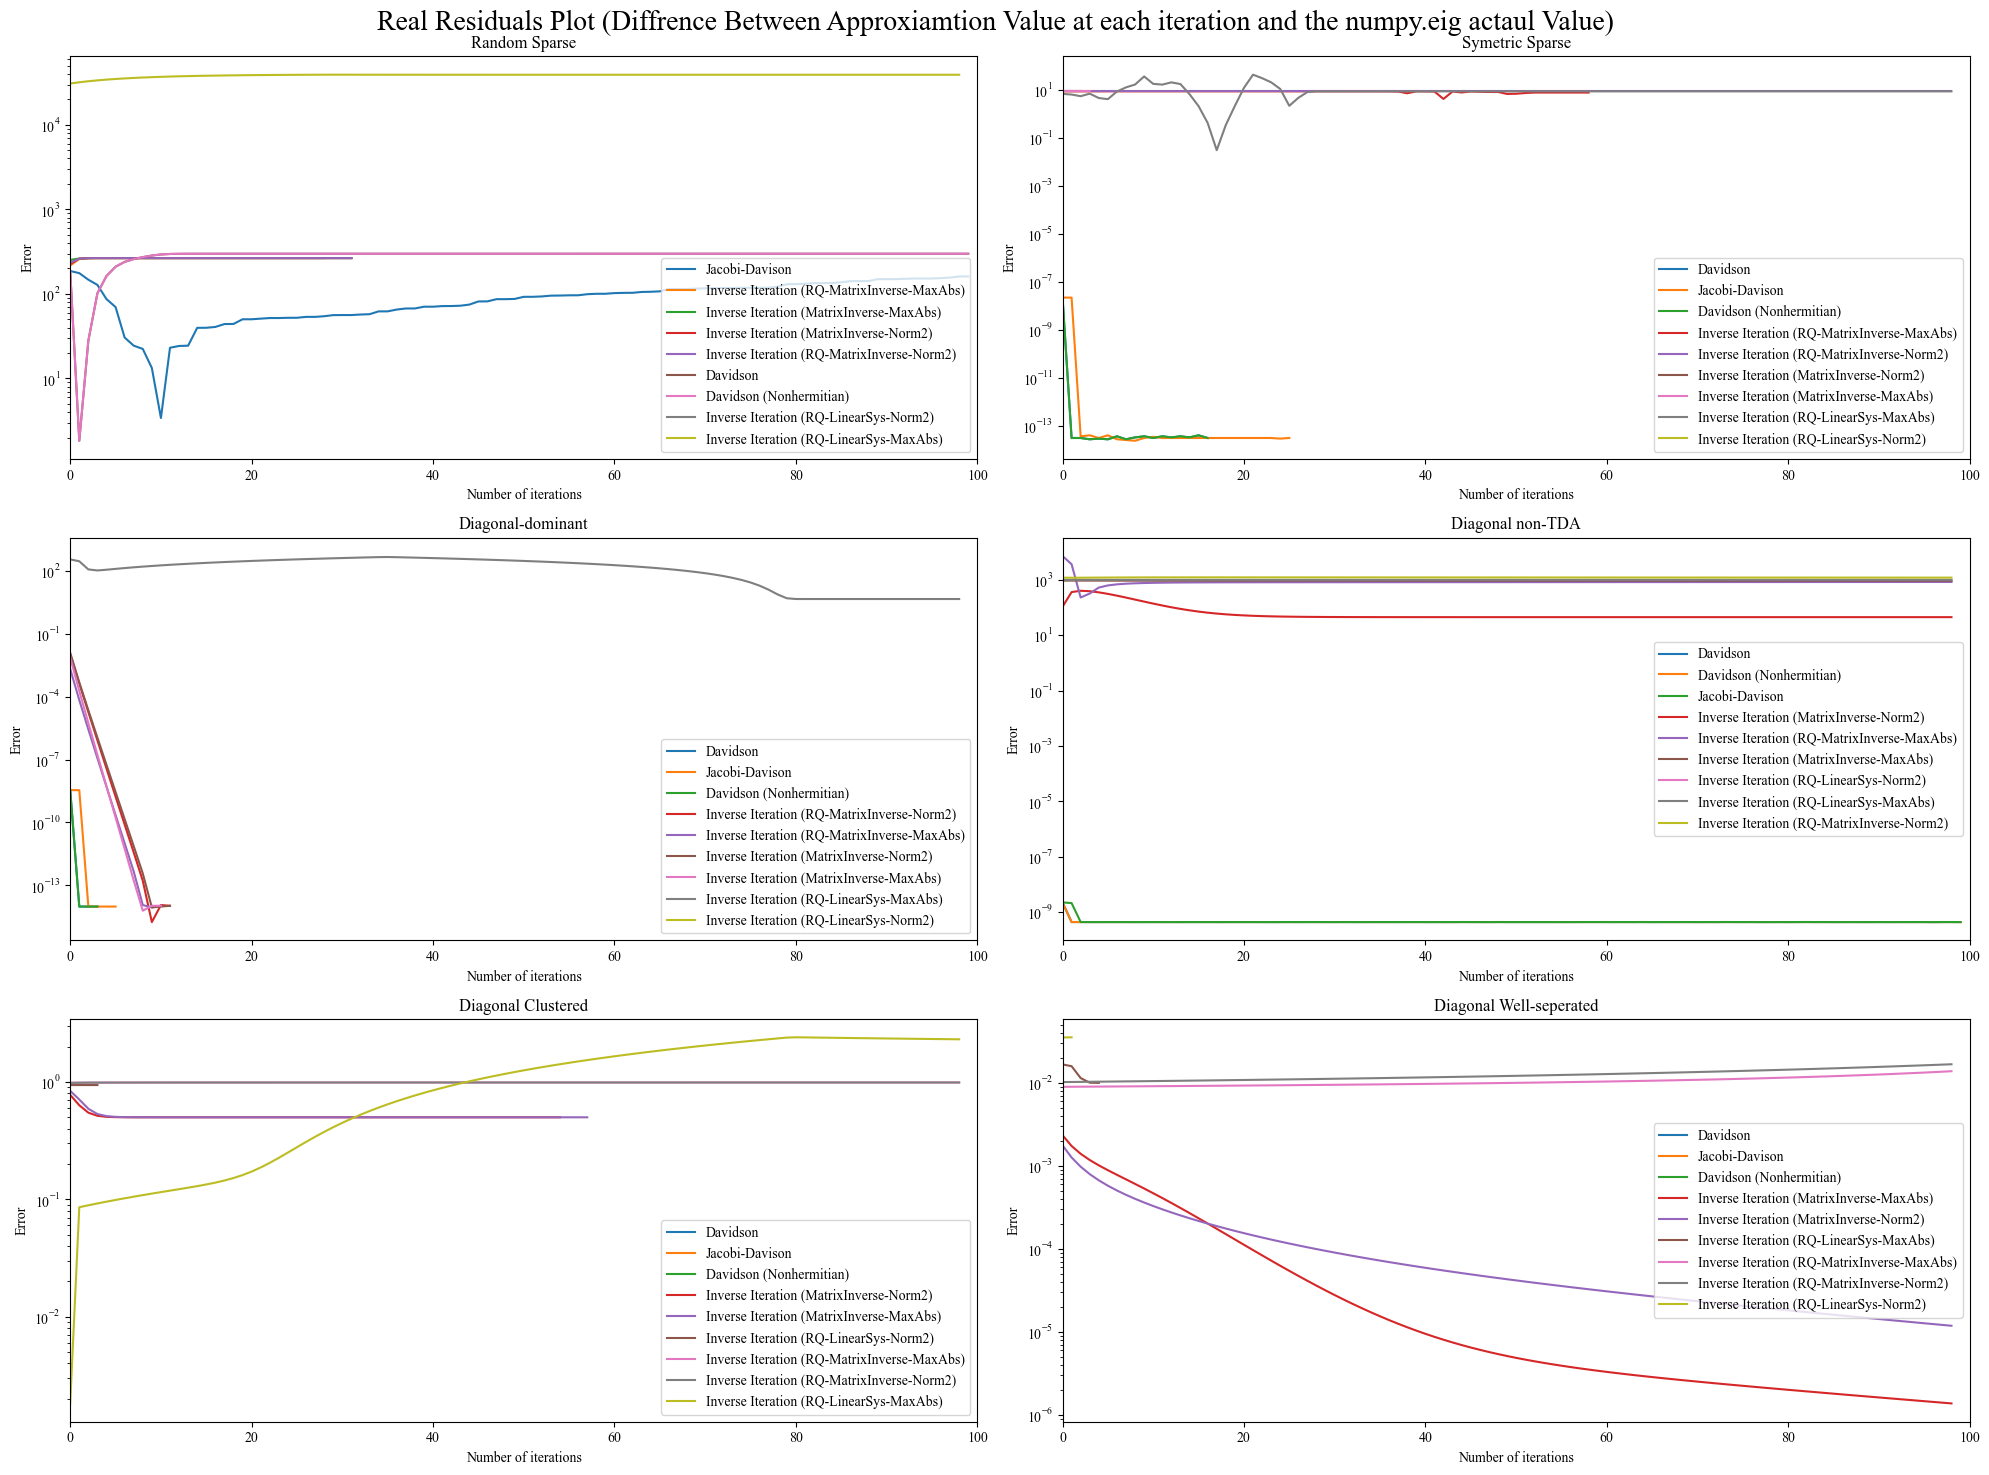

In [50]:
fig=plot_results(df_smallest_results,'real_diff')
fig.savefig('smallest_real_diff.svg')

C:\Users\HP OMEN\AppData\Local\Temp\ipykernel_7088\2793290441.py:52: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[i,j].set_xlim(0,maxiter)


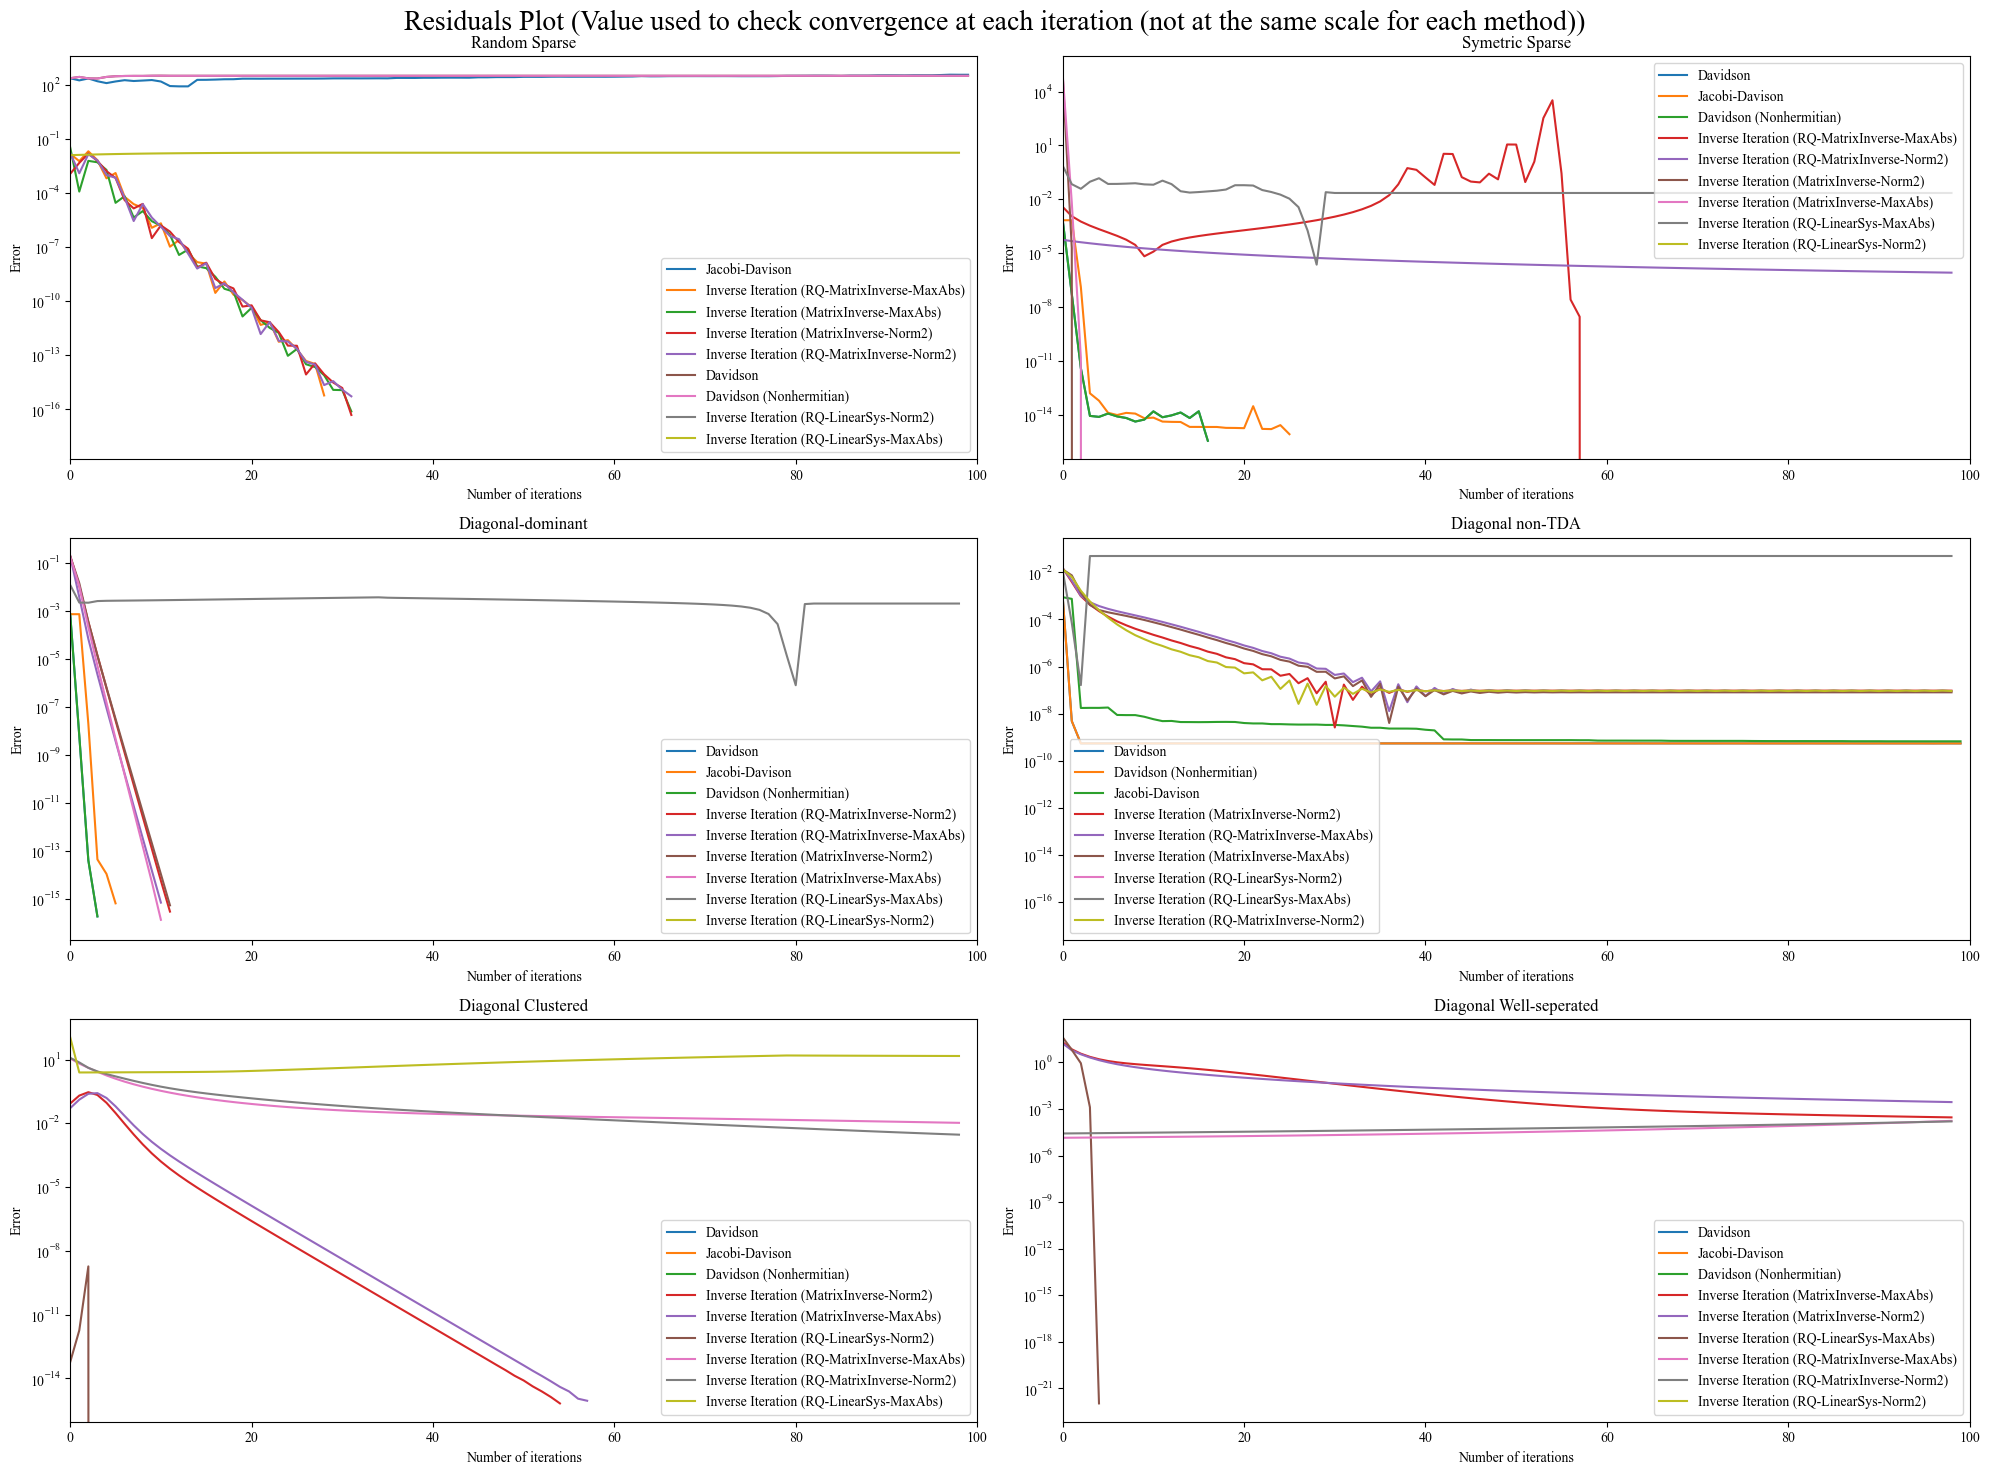

In [51]:
fig=plot_results(df_smallest_results,'residuals')
fig.savefig('smallest_residuals.svg')

In [52]:
# plot_results('approx_eigens')

In [53]:
# import numpy as np
# import matplotlib.pyplot as plt
# import copy
# from random import randrange


# from seaborn import color_palette
# %matplotlib inline

# # for method_name,result in df_results.iterrows():
#     # plt.(result[0],label=method_name)
# plt.barh(y=df_results.index.values,width=df_results.iloc[:,3],color=[(randrange(255)/255.0, randrange(255)/255.0, randrange(255)/255.0) for i in range(len(df_results))])

# plt.xlabel('Error')
# plt.ylabel('Method')
# # plt.xticks()
# # plt.xlim(0,1)
# # plt.ylim(0.99978,.99999)
# plt.legend(loc='best',fontsize='6')

# Biggest EigenValue

## Defining Methods

In [54]:
k=1
biggest_methods_list={
    'Numpy.eig':partial(methods.numpy_eigen,l=size-k,u=size),
    'Power Method':partial(methods.power_iteration,maxiter=maxiter,tol=tol,output_approx_instead_of_residuals=True),
    # 'block power_method':partial(methods.block_power_method,maxiter=maxiter,tol=tol,k=k),
    'Subspace Iteration (1)':partial(methods.subspace_iteration_1,maxiter=maxiter,tol=tol,k=k),
    'Subspace Iteration (2)':partial(methods.subspace_iteration_2,maxiter=maxiter,tol=tol,k=k),
    # 'lancoz_1':partial(methods.lanczos_1,maxiter=maxiter),
    # 'lancoz_2':partial(methods.lanczos_2,maxiter=maxiter),
         }

## Running Methods

In [55]:
biggest_results={}
for matrix_name, matrix in matrices.items():
    matrix_results={} 
    for name, method in biggest_methods_list.items():
         eigen_value,eigen_vector,duration,iteration,residuals,approx_eigens=method(matrix)
         matrix_results[name]={'eigen_value':eigen_value, 'eigen_vector':eigen_vector,'duration':duration,'iteration':iteration, 'residuals':residuals,'approx_eigens':approx_eigens }
    biggest_results[matrix_name]=matrix_results


2024-01-30 08:21:24.934 | SUCCESS  | methods:numpy_eigen:758 - numpy = [5006.8700948+0.j]; time = 0.01803874969482422 seconds
2024-01-30 08:21:24.943 | INFO     | methods:power_iteration:408 - Power iteration converged at iteration number = 13
2024-01-30 08:21:24.946 | SUCCESS  | methods:power_iteration:418 - Power iteration: use_inverse = True, use_rayleigh = False, norm_c_mode = 2 = 5006.870094799971; time = 0.00998234748840332 seconds.
2024-01-30 08:21:24.970 | INFO     | methods:subspace_iteration_1:176 - Subspace_1 converged at iteration number = 13
2024-01-30 08:21:24.972 | SUCCESS  | methods:subspace_iteration_1:183 - Subspace iteration = [5006.8700948]; time = 0.0040130615234375 seconds.
2024-01-30 08:21:25.029 | SUCCESS  | methods:subspace_iteration_2:216 - Subspace iteration_2 = [5006.8700948]; time = 0.05432271957397461 seconds.
2024-01-30 08:21:25.043 | SUCCESS  | methods:numpy_eigen:758 - numpy = [89.999986]; time = 0.013997793197631836 seconds
2024-01-30 08:21:25.091 | SU

## Making Dataframes

In [56]:
df_biggest_results={}
for matrix_name, matrix_results in biggest_results.items():

    df_matrix_results=pd.DataFrame(matrix_results).T
    df_biggest_results[matrix_name]=df_matrix_results
    # df_matrix_results.loc[:,'eigen_value']=df_matrix_results.iloc[:,0].apply(lambda x:x.item() if type(x) is not float else x)
    df_matrix_results['eigen_value']=df_matrix_results['eigen_value'].apply(np.ravel)
    df_matrix_results['approx_eigens']=df_matrix_results['approx_eigens'].apply(np.ravel)
    df_matrix_results['residuals']=abs(df_matrix_results['residuals'].apply(np.ravel))
    df_matrix_results['eigen_vector']=df_matrix_results['eigen_vector'].apply(np.ravel)
    df_matrix_results['residual_diff']=abs(df_matrix_results['eigen_value']-df_matrix_results['eigen_value'][0])
    df_matrix_results['real_diff']=abs(df_matrix_results['approx_eigens']-df_matrix_results['eigen_value'][0])
    df_matrix_results['residual_diff']=df_matrix_results['residual_diff'].apply(np.ravel)
    # df_matrix_results=df_matrix_results.sort_values(by='residual_diff')
    df_biggest_results[matrix_name]=df_matrix_results


## Results

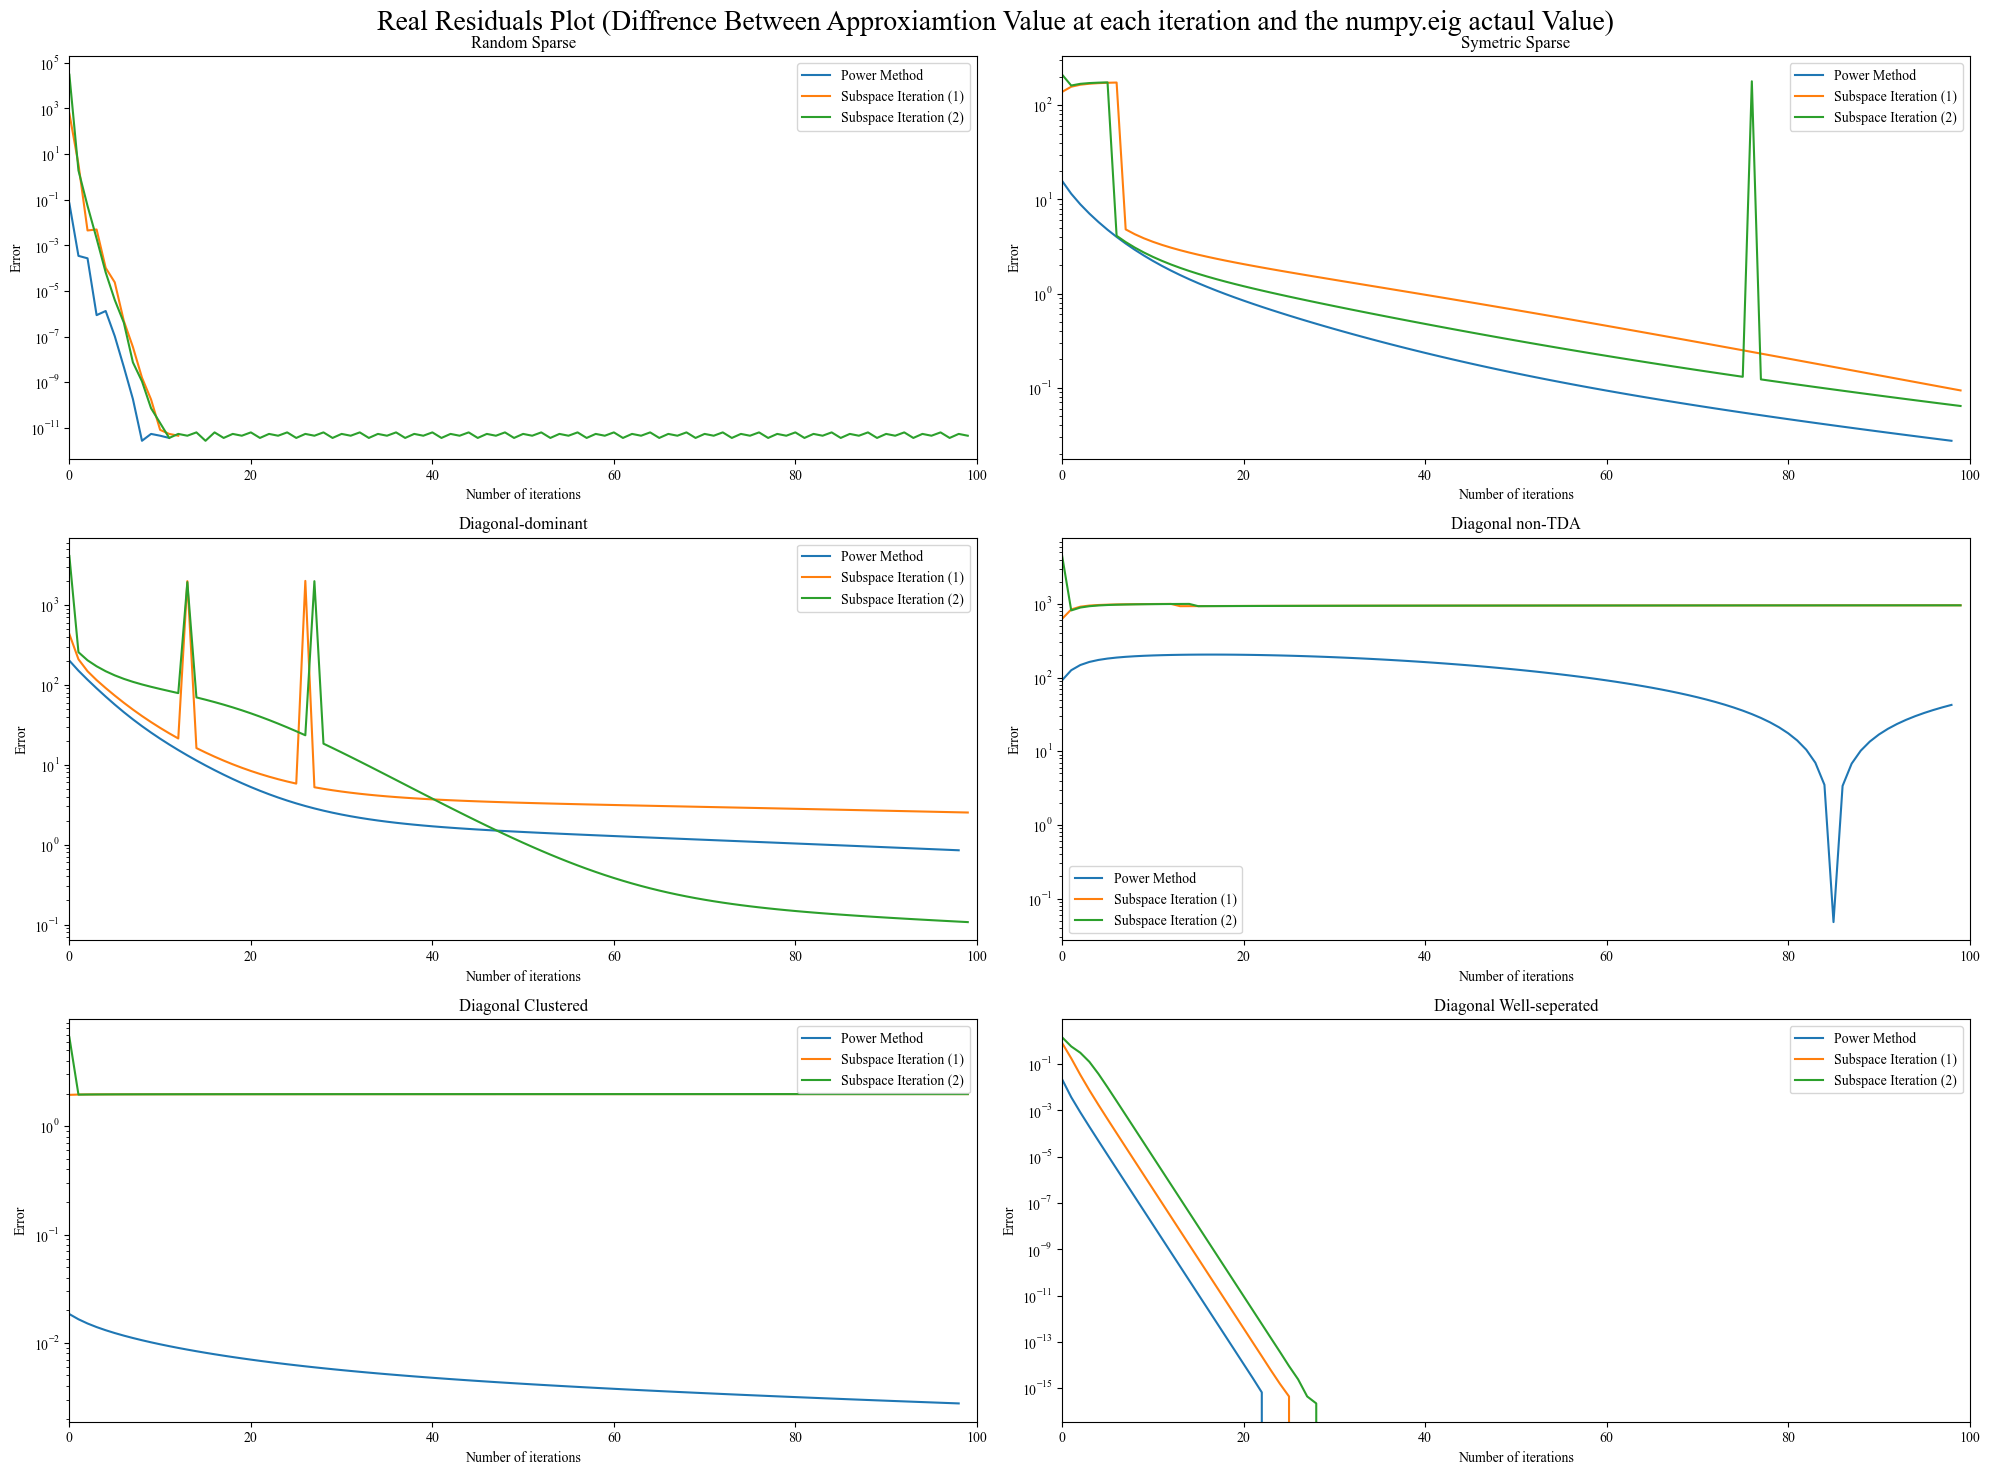

In [57]:
fig=plot_results(df_biggest_results,'real_diff')
fig.savefig('biggest_real_diff.svg')

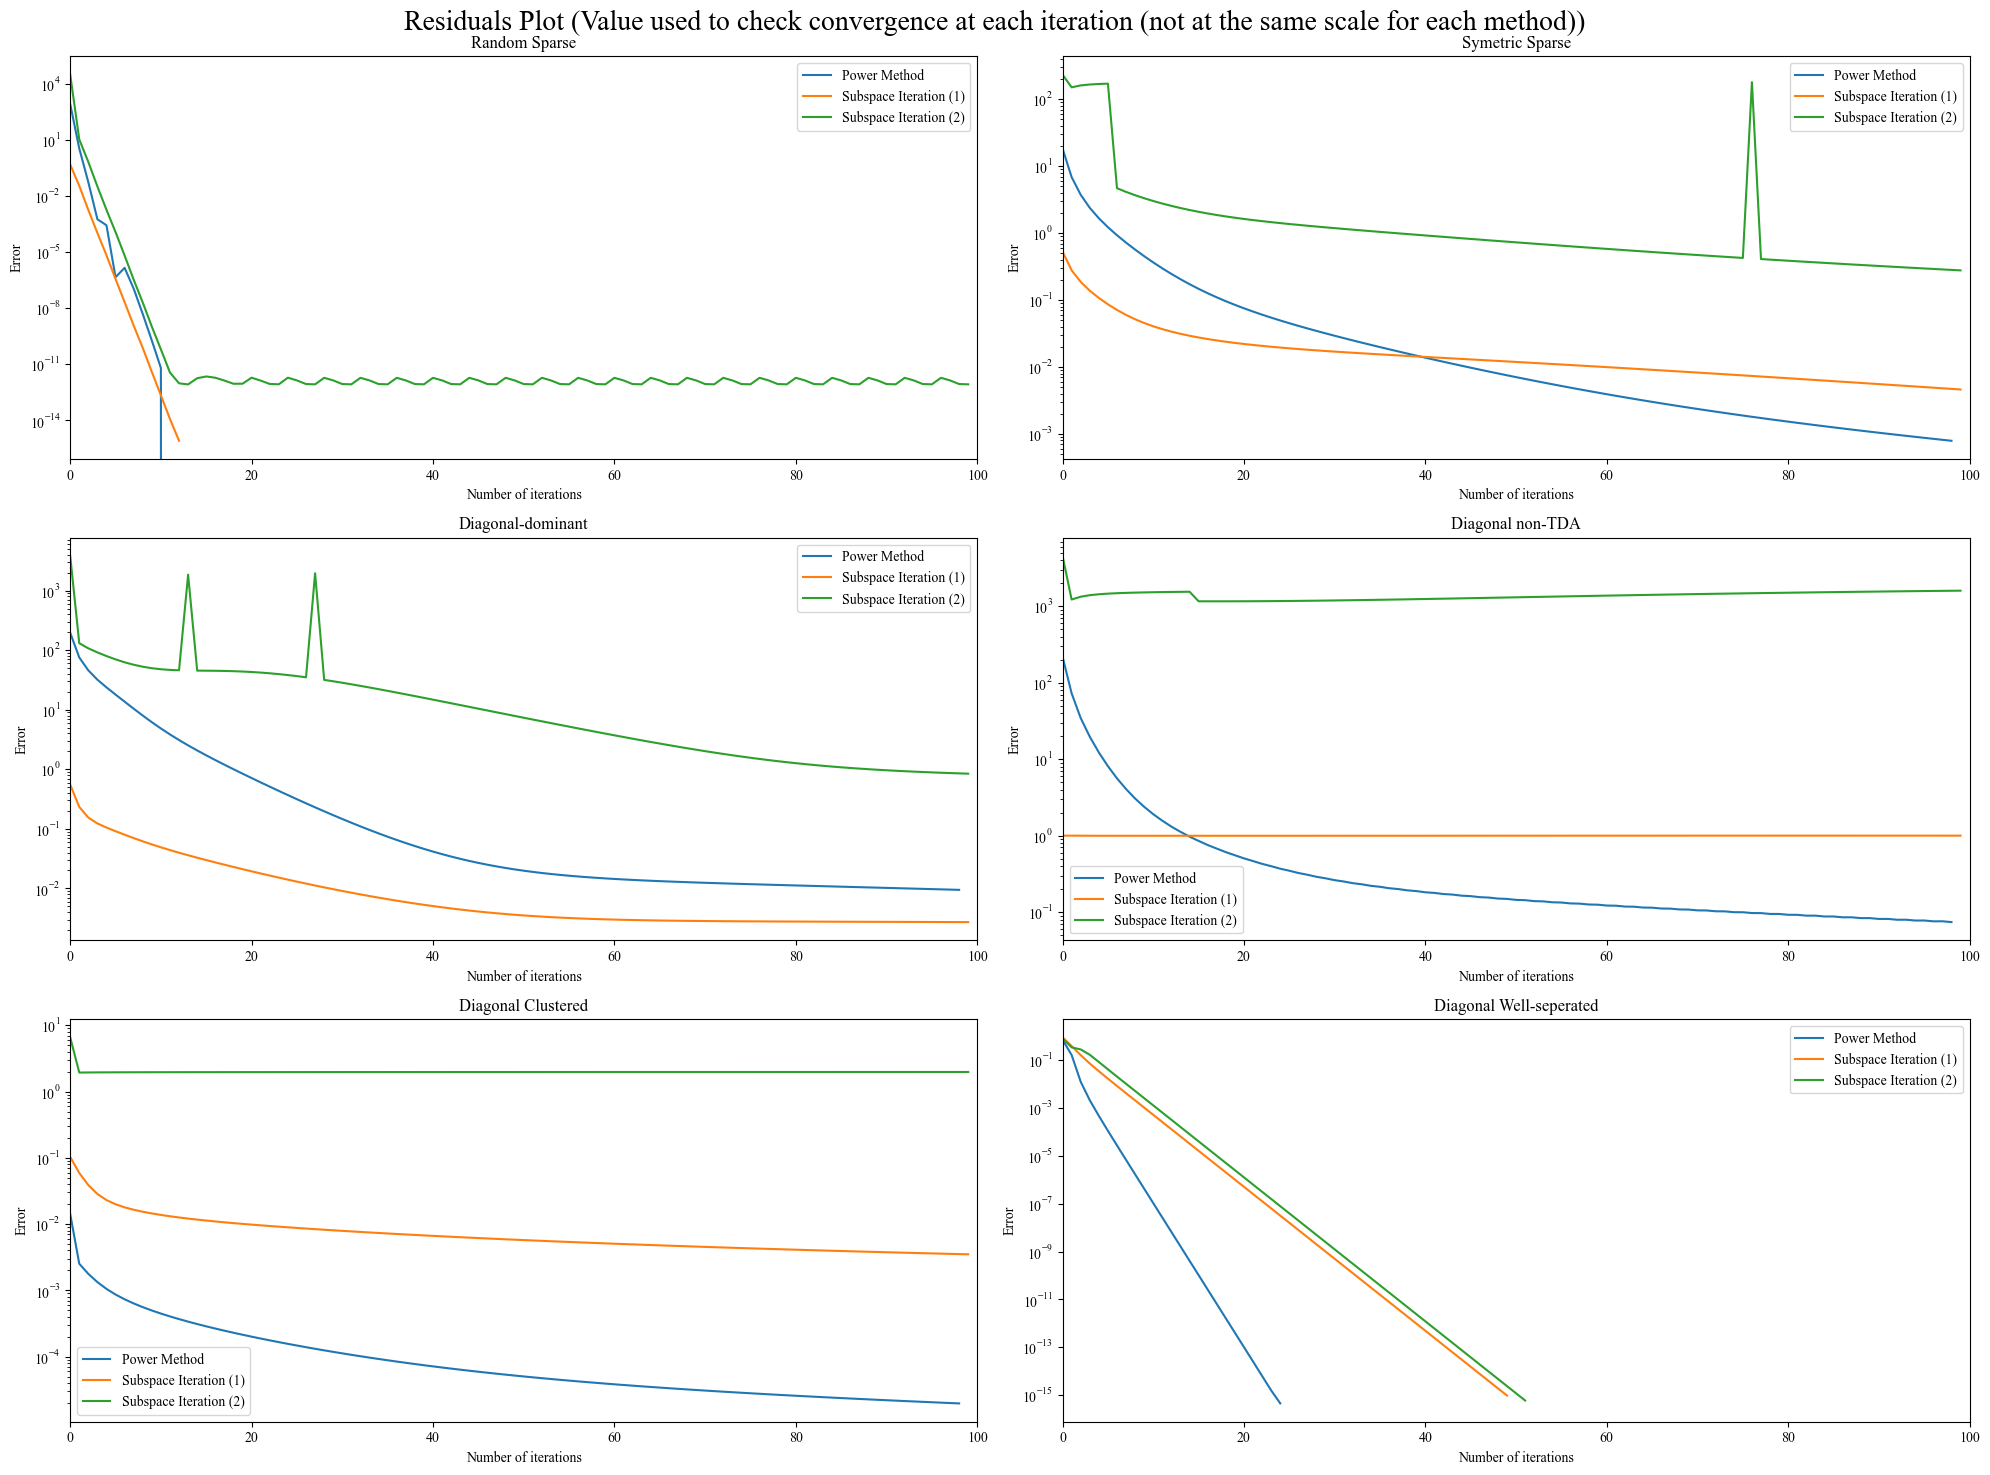

In [58]:
fig=plot_results(df_biggest_results,'residuals')
fig.savefig('biggest_residuals.svg')

In [59]:
with open('biggest_results','wb') as f:
    pickle.dump(df_biggest_results,f)


with open('smallest_results','wb') as f:
    pickle.dump(df_smallest_results,f)

In [73]:
df_biggest_results_report=df_biggest_results.copy()
cols=df_biggest_results['Diagonal-dominant'].columns.tolist()
cols.remove('eigen_vector')
cols.remove('residuals')
cols.remove('approx_eigens')
cols.remove('real_diff')
for matrix_name,df in df_biggest_results_report.items():

    df['eigen_value']=df['eigen_value'].apply(lambda x:x.item() if type(x) is  list else x)
    df['eigen_value']=df['eigen_value'].apply(lambda x:x.real if type(x) is  complex else x)

    df['residual_diff']=df['residual_diff'].apply(lambda x:x.item() if type(x) is list else x)
    df=df.sort_values(by='residual_diff')


    df=df[cols]
    df.columns=['Eigenvalue','Duration','Iterations','$\|$Exact-Approx$\|$']
    caption=matrix_name+" Matrix Results for Biggest Eigenvalue Finding"
    label='biggest:'+matrix_name
    print(df.style.to_latex(   column_format="rrrrr", position="h", position_float="centering",
        hrules=True, label=label, caption=caption,
        multirow_align="t", multicol_align="r"))

\begin{table}[h]
\centering
\caption{Random Sparse Matrix Results for Biggest Eigenvalue Finding}
\label{biggest:Random Sparse}
\begin{tabular}{rrrrr}
\toprule
 & Eigenvalue & Duration & Iterations & $\|$Exact-Approx$\|$ \\
\midrule
Numpy.eig & 5006.870095 & 0.018039 & 0 & 0.000000 \\
Power Method & 5006.870095 & 0.009982 & 13 & 0.000000 \\
Subspace Iteration (1) & 5006.870095 & 0.004013 & 13 & 0.000000 \\
Subspace Iteration (2) & 5006.870095 & 0.054323 & 100 & 0.000000 \\
\bottomrule
\end{tabular}
\end{table}

\begin{table}[h]
\centering
\caption{Symetric Sparse Matrix Results for Biggest Eigenvalue Finding}
\label{biggest:Symetric Sparse}
\begin{tabular}{rrrrr}
\toprule
 & Eigenvalue & Duration & Iterations & $\|$Exact-Approx$\|$ \\
\midrule
Numpy.eig & 89.999986 & 0.013998 & 0 & 0.000000 \\
Power Method & 89.972680 & 0.045580 & 100 & 0.027306 \\
Subspace Iteration (2) & 89.936039 & 0.052255 & 100 & 0.063947 \\
Subspace Iteration (1) & 89.906411 & 0.032992 & 100 & 0.093575 \\
\bottom

In [72]:
df_smallest_results_report=df_smallest_results.copy()
cols=df_smallest_results['Diagonal-dominant'].columns.tolist()
cols.remove('eigen_vector')
cols.remove('residuals')
cols.remove('approx_eigens')
cols.remove('real_diff')
for matrix_name,df in df_smallest_results_report.items():

    df['eigen_value']=df['eigen_value'].apply(lambda x:x.item() if type(x) is  list else x)
    df['eigen_value']=df['eigen_value'].apply(lambda x:x.real if type(x) is  complex else x)

    df['residual_diff']=df['residual_diff'].apply(lambda x:x.item() if type(x) is list else x)
    df=df.sort_values(by='residual_diff')


    df=df[cols]
    df.columns=['Eigenvalue','Duration','Iterations','$\|$Exact-Approx$\|$']
    caption=matrix_name+" Matrix Results for Smallest Eigenvalue Finding"
    label='smallest:'+matrix_name
    print(df.style.to_latex(   column_format="rrrrr", position="h", position_float="centering",
        hrules=True, label=label, caption=caption,
        multirow_align="t", multicol_align="r"))

\begin{table}[h]
\centering
\caption{Random Sparse Matrix Results for Smallest Eigenvalue Finding}
\label{smallest:Random Sparse}
\begin{tabular}{rrrrr}
\toprule
 & Eigenvalue & Duration & Iterations & $\|$Exact-Approx$\|$ \\
\midrule
Numpy.eig & -282.460830 & 0.023014 & 0 & 0.000000 \\
Jacobi-Davison & -443.445120 & 2.342019 & 100 & 160.984290 \\
Inverse Iteration (RQ-MatrixInverse-MaxAbs) & -17.269904 & 0.222637 & 30 & 265.190926 \\
Inverse Iteration (MatrixInverse-MaxAbs) & -17.269904 & 0.032021 & 33 & 265.190926 \\
Inverse Iteration (MatrixInverse-Norm2) & -17.269904 & 0.031997 & 33 & 265.190926 \\
Inverse Iteration (RQ-MatrixInverse-Norm2) & -17.269904 & 0.431963 & 33 & 265.190926 \\
Davidson & -581.360635 & 0.894053 & 100 & 298.899805 \\
Davidson (Nonhermitian) & -581.360635 & 0.680997 & 100 & 298.899805 \\
Inverse Iteration (RQ-LinearSys-Norm2) & 5006.842219 & 0.005007 & 2 & 5289.303049 \\
Inverse Iteration (RQ-LinearSys-MaxAbs) & -39424.627925 & 0.077648 & 100 & 39142.167095 \\

In [67]:
df_biggest_results['Diagonal-dominant']

,eigen_value,eigen_vector,duration,iteration,residuals,approx_eigens,residual_diff,real_diff
Numpy.eig,999.714715,"[8.763071708721524e-08, -4.4073808822518794e-0...",0.013057,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[999.7147146873658],0.000000,[0.0]
Power Method,998.864902,"[1.159032140299907e-08, -1.1188709682101648e-0...",0.045001,100,"[195.82659360868547, 75.48008869569003, 45.739...","[799.2745781451675, 849.5563808916032, 884.003...",0.849813,"[200.44013654219827, 150.1583337957626, 115.71..."
Subspace Iteration (1),997.192732,"[-1.8231644416388804e-08, 1.285091252529867e-0...",0.029536,100,"[0.55316471076809, 0.23296074663700964, 0.1543...","[569.797301466214, 791.1912606069094, 851.9558...",2.521983,"[429.91741322115183, 208.52345408045642, 147.7..."
Subspace Iteration (2),999.607389,"[-1.753938438930902e-08, 6.755619472897689e-08...",0.050052,100,"[3814.560214106244, 130.88580564787324, 107.31...","[-3085.276463809832, 743.9961583650386, 797.28...",0.107325,"[4084.991178497198, 255.71855632232723, 202.42..."
